# Smith Chart Analysis

## Introduction to the Smith Chart

The **Smith Chart** is a graphical tool used in RF and microwave engineering for visualizing complex impedances and solving transmission line problems. It maps the complex impedance plane onto the complex reflection coefficient plane using a conformal transformation.

## Mathematical Foundation

### Key Relationships

The Smith Chart is based on the relationship between normalized impedance and reflection coefficient:

$$z = r + jx = \frac{Z}{Z_0}$$

$$\Gamma = \frac{Z - Z_0}{Z + Z_0} = \Gamma_r + j\Gamma_i = \frac{z - 1}{z + 1} $$

Where:
- $z$ = normalized impedance
- $r$ = normalized resistance 
- $x$ = normalized reactance
- $\Gamma$ = reflection coefficient
- $Z_0$ = characteristic impedance (typically 50Ω)

## Part 1 Constant Circle Equations

**Constant Resistance Circles:**
$$|\Gamma - \frac{r}{r+1}| = \frac{1}{r+1}$$

**Constant Reactance Circles:**
$$|\Gamma - (1 + \frac{j}{x})| = \frac{1}{|x|}$$



### Smith Chart Implementation

This implementation creates the basic Smith Chart structure by plotting:

1. **Constant Resistance Circles** (red solid lines)
2. **Constant Reactance Circles** (red lines - solid for positive, dashed for negative)
3. **Unit Circle Boundary** (|Γ| = 1, representing the edge of the Smith Chart)

**Code Structure:**

- `gamma_from_z()`: Converts normalized impedance to reflection coefficient
- `circle_constant_r()`: Generates points for constant resistance circles  
- `circle_constant_x()`: Generates points for constant reactance circles

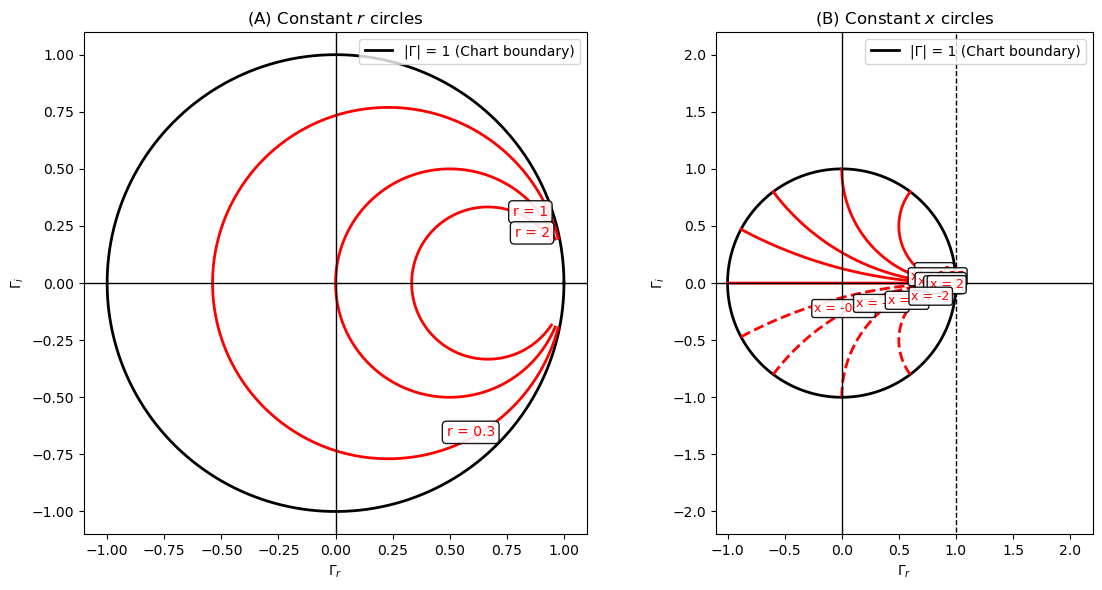

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Helper functions
# -----------------------------

def gamma_from_z(z):
    """
    Map normalized impedance z = r + jx to reflection coefficient Γ.
    Γ = (z - 1)/(z + 1)
    z can be a complex numpy array.
    """
    return (z - 1) / (z + 1)

def circle_constant_r(r, x_span=np.linspace(-10, 10, 2000)):
    """
    Return Γ(=Γ_r + jΓ_i) for constant normalized resistance r,
    sweeping reactance x.
    """
    z = r + 1j * x_span
    return gamma_from_z(z)

def circle_constant_x(x, r_span=np.linspace(0, 10, 2000)):
    """
    Return Γ for constant normalized reactance x,
    sweeping resistance r ≥ 0.
    """
    z = r_span + 1j * x
    return gamma_from_z(z)

# -----------------------------
# Start plotting
# -----------------------------

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#####################################
# (A) Constant resistance circles
#####################################
axA = axes[0]

# Draw the |Γ| = 1 unit circle (Smith chart boundary)
theta = np.linspace(0, 2*np.pi, 400)
axA.plot(np.cos(theta), np.sin(theta), color='black', linewidth=2, label='|Γ| = 1 (Chart boundary)')

# Choose r values you want to show
r_list = [0.3, 1, 2]
label_positions = [800, 1900, 1400]  # Spread positions more to avoid overlap
label_offsets = [(0.05, 0.05), (-0.1, 0.1), (0.1, -0.1)]  # Manual offsets for better positioning
for i, r in enumerate(r_list):
    g = circle_constant_r(r)
    axA.plot(np.real(g), np.imag(g), color='red', linewidth=2)
    # Put a text label at optimized positions to avoid overlap
    idx = label_positions[i]
    x_pos = np.real(g[idx]) + label_offsets[i][0]
    y_pos = np.imag(g[idx]) + label_offsets[i][1]
    axA.text(x_pos, y_pos, f"r = {r}", color='red', 
             fontsize=10, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

# Axes lines
axA.axhline(0, color='black', linewidth=1)
axA.axvline(0, color='black', linewidth=1)

# Cosmetics
axA.set_aspect('equal', 'box')
axA.set_xlim(-1.1, 1.1)
axA.set_ylim(-1.1, 1.1)
axA.set_xlabel(r'$\Gamma_r$')
axA.set_ylabel(r'$\Gamma_i$')
axA.set_title('(A) Constant $r$ circles')
axA.legend(loc='upper right')

#####################################
# (B) Constant reactance circles
#####################################
axB = axes[1]

# Smith chart boundary again
axB.plot(np.cos(theta), np.sin(theta), color='black', linewidth=2, label='|Γ| = 1 (Chart boundary)')

# x values to draw
x_list_pos = [0, 0.25, 0.5, 1, 2]
x_list_neg = [-0.25, -0.5, -1, -2]

# Positive (inductive, usually drawn solid)
pos_label_positions = [1900, 1700, 1500, 1300, 1100]  # Better spread out positions
pos_offsets = [(0, 0.1), (0.05, 0.05), (0.1, 0), (0.15, -0.05), (0.2, -0.1)]  # Manual offsets
for i, x in enumerate(x_list_pos):
    g = circle_constant_x(x)
    axB.plot(np.real(g), np.imag(g), color='red', linestyle='-', linewidth=2)
    idx = pos_label_positions[i]
    x_pos = np.real(g[idx]) + pos_offsets[i][0]
    y_pos = np.imag(g[idx]) + pos_offsets[i][1]
    axB.text(x_pos, y_pos, f"x = {x}", color='red',
             fontsize=9, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))

# Negative (capacitive, usually dashed)
neg_label_positions = [200, 350, 500, 700]  # Better positions for negative values
neg_offsets = [(0, -0.1), (0.05, -0.05), (0.1, 0), (0.15, 0.05)]  # Manual offsets
for i, x in enumerate(x_list_neg):
    g = circle_constant_x(x)
    axB.plot(np.real(g), np.imag(g), color='red', linestyle='--', linewidth=2)
    idx = neg_label_positions[i]
    x_pos = np.real(g[idx]) + neg_offsets[i][0]
    y_pos = np.imag(g[idx]) + neg_offsets[i][1]
    axB.text(x_pos, y_pos, f"x = {x}", color='red',
             fontsize=9, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))

# Axes lines
axB.axhline(0, color='black', linewidth=1)
axB.axvline(0, color='black', linewidth=1)

# Dashed vertical line at Γ_r = 1 (centers of the x-circles lie on Γ_r = 1)
axB.plot([1, 1], [-3, 3], 'k--', linewidth=1)

# Cosmetics
axB.set_aspect('equal', 'box')
axB.set_xlim(-1.1, 2.2)   # wider, because constant-x circles extend past |Γ|=1
axB.set_ylim(-2.2, 2.2)
axB.set_xlabel(r'$\Gamma_r$')
axB.set_ylabel(r'$\Gamma_i$')
axB.set_title('(B) Constant $x$ circles')
axB.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Key Points on the Smith Chart:

| Point | Γ | z | Physical Meaning |
|-------|---|---|------------------|
| (-1, 0) | -1 | 0 | Short circuit |
| (0, 0) | 0 | 1 | Matched load (Z₀) |
| (+1, 0) | +1 | ∞ | Open circuit |
| (0, +j) | +j | j | Pure inductance |
| (0, -j) | -j | -j | Pure capacitance |

## Part2 Transmission Line Propagating in Smith Chart

### Transmission Line Propagation Visualization

This demonstration shows how impedance transforms as signals propagate along transmission lines:

#### **Lossless Transmission Line:**
- **Perfect circles**: Impedance rotates around constant |Γ| circles
- **No attenuation**: Reflection coefficient magnitude remains constant
- **Pure rotation**: $\Gamma(l) = \Gamma_L e^{-j2\beta l}$

#### **Lossy Transmission Line:**
- **Spiral paths**: Impedance spirals inward toward chart center
- **Attenuation**: Reflection coefficient magnitude decreases with distance
- **Combined effect**: $\Gamma(l) = \Gamma_L e^{-(\alpha + j\beta)2l}$

#### **Key Observations:**
- **Direction**: Clockwise rotation represents propagation toward generator
- **Multiple loads**: Different starting impedances show various path shapes
- **Loss effect**: All paths eventually converge to the matched center (Γ = 0)

The visualization demonstrates why **impedance matching** becomes less critical for **very long lossy lines** - they naturally tend toward the characteristic impedance.


Inductive Load: ZL = 30.0+40.0j Ω, zL = 0.600+0.800j, ΓL = 0.000+0.500j

Capacitive Load: ZL = 75.0-25.0j Ω, zL = 1.500-0.500j, ΓL = 0.231-0.154j

Resistive Load: ZL = 100.0+0.0j Ω, zL = 2.000+0.000j, ΓL = 0.333+0.000j

High Reactance Load: ZL = 25.0+75.0j Ω, zL = 0.500+1.500j, ΓL = 0.333+0.667j


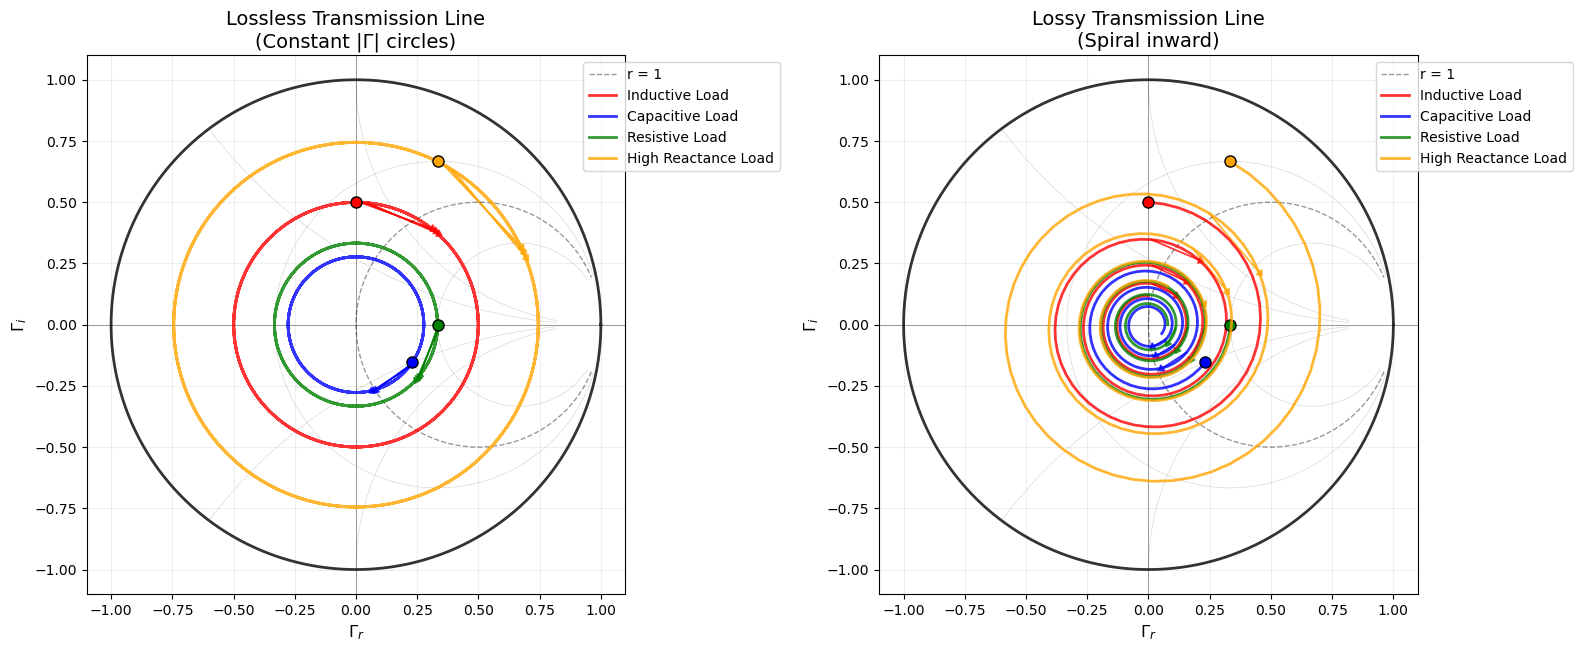


DETAILED ANALYSIS: Inductive Load (30 + j40 Ω)
Load impedance: ZL = 30.0+40.0j Ω
Normalized load: zL = 0.600+0.800j
Load reflection coeff: ΓL = 0.000+0.500j
Initial |ΓL| = 0.500
Initial VSWR = 3.00

Transformation along transmission line:
Length(λ) | Lossless Γ | Lossy Γ   | Lossless Z(Ω) | Lossy Z(Ω)
----------------------------------------------------------------------
   0.000 | 0.000+0.500j | 0.000+0.500j |    30.0+40.0j | 30.0+40.0j
   0.125 | 0.500+0.000j | 0.457+0.000j |    150.0+0.0j | 134.1+0.0j
   0.250 | 0.000-0.500j | 0.000-0.417j |    30.0-40.0j | 35.2-35.5j
   0.500 | -0.000+0.500j | -0.000+0.348j |    30.0+40.0j | 39.2+31.1j
   1.000 | -0.000+0.500j | -0.000+0.243j |    30.0+40.0j | 44.4+22.9j

Note: Loss parameter used: 1.0 dB/wavelength
Arrows show direction toward generator (increasing line length)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# -----------------------------------------
# Transmission Line Propagation on Smith Chart
# -----------------------------------------

# Parameters
Z0 = 50.0                    # Characteristic impedance (Ω)
f = 2.4e9                   # Frequency (Hz)
c = 3e8                     # Speed of light (m/s)
vp = 0.66 * c              # Phase velocity in transmission line
wavelength = vp / f         # Wavelength in the line
beta = 2*np.pi / wavelength # Phase constant (rad/m)

# Define several load impedances to demonstrate
loads = [
    30 + 40j,    # Inductive load
    75 - 25j,    # Capacitive load  
    100 + 0j,    # Pure resistive (mismatched)
    25 + 75j     # High reactance load
]

load_names = ['Inductive Load', 'Capacitive Load', 'Resistive Load', 'High Reactance Load']
colors = ['red', 'blue', 'green', 'orange']

# Transmission line lengths to analyze (in wavelengths)
line_lengths = np.linspace(0, 2, 200)  # 0 to 2 wavelengths

# Loss parameters for lossy line
alpha_db_per_wavelength = 1.0  # 1 dB loss per wavelength
alpha_np = alpha_db_per_wavelength / (20 * np.log10(np.e))  # Convert to Np

# -----------------------------------------
# Create Smith Chart plots
# -----------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Draw Smith Chart boundaries and reference circles
for ax_idx, ax in enumerate(axes):
    # Smith Chart boundary
    theta = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, alpha=0.8)
    
    # Reference circles
    # r = 1 circle
    g_r1 = circle_constant_r(1)
    ax.plot(np.real(g_r1), np.imag(g_r1), 'k--', linewidth=1, alpha=0.4, label='r = 1')
    
    # Some resistance circles for reference
    for r_val in [0.5, 2]:
        g_r = circle_constant_r(r_val)
        ax.plot(np.real(g_r), np.imag(g_r), 'gray', linewidth=0.5, alpha=0.3)
    
    # Some reactance circles for reference  
    for x_val in [0.5, 1, -0.5, -1]:
        g_x = circle_constant_x(x_val)
        ax.plot(np.real(g_x), np.imag(g_x), 'gray', linewidth=0.5, alpha=0.3)
    
    # Axes
    ax.axhline(0, color='black', linewidth=0.5, alpha=0.5)
    ax.axvline(0, color='black', linewidth=0.5, alpha=0.5)
    
    # Formatting
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(r'$\Gamma_r$', fontsize=12)
    ax.set_ylabel(r'$\Gamma_i$', fontsize=12)
    ax.grid(True, alpha=0.2)

axes[0].set_title('Lossless Transmission Line\n(Constant |Γ| circles)', fontsize=14)
axes[1].set_title('Lossy Transmission Line\n(Spiral inward)', fontsize=14)

# -----------------------------------------
# Calculate and plot transmission line transformations
# -----------------------------------------

for load_idx, (ZL, name, color) in enumerate(zip(loads, load_names, colors)):
    # Normalize load impedance
    zL = ZL / Z0
    gamma_load = gamma_from_z(zL)
    
    print(f"\n{name}: ZL = {ZL:.1f} Ω, zL = {zL:.3f}, ΓL = {gamma_load:.3f}")
    
    # Arrays to store impedance transformation
    gamma_lossless = np.zeros(len(line_lengths), dtype=complex)
    gamma_lossy = np.zeros(len(line_lengths), dtype=complex)
    
    for i, length in enumerate(line_lengths):
        # Physical length in meters
        physical_length = length * wavelength
        
        # Lossless line: Γ(l) = ΓL * exp(-j2βl)
        phase_shift = -2 * beta * physical_length
        gamma_lossless[i] = gamma_load * np.exp(1j * phase_shift)
        
        # Lossy line: Γ(l) = ΓL * exp(-(α + jβ)2l)
        # Include both attenuation and phase shift
        attenuation = alpha_np * length * 2 * np.pi  # Total attenuation
        gamma_lossy[i] = gamma_load * np.exp(-attenuation) * np.exp(1j * phase_shift)
    
    # Plot lossless transformation (perfect circle)
    axes[0].plot(np.real(gamma_lossless), np.imag(gamma_lossless), 
                color=color, linewidth=2, alpha=0.8, label=name)
    
    # Mark starting point (load)
    axes[0].plot(np.real(gamma_load), np.imag(gamma_load), 
                'o', color=color, markersize=8, markeredgecolor='black', markeredgewidth=1)
    
    # Plot lossy transformation (spiral inward)
    axes[1].plot(np.real(gamma_lossy), np.imag(gamma_lossy), 
                color=color, linewidth=2, alpha=0.8, label=name)
    
    # Mark starting point (load) 
    axes[1].plot(np.real(gamma_load), np.imag(gamma_load), 
                'o', color=color, markersize=8, markeredgecolor='black', markeredgewidth=1)
    
    # Add arrows to show direction of propagation
    # Sample points along the path for arrow placement
    arrow_indices = [len(line_lengths)//4, len(line_lengths)//2, 3*len(line_lengths)//4]
    
    for arr_idx in arrow_indices:
        if arr_idx < len(line_lengths) - 10:
            # Lossless arrows
            dx_loss = np.real(gamma_lossless[arr_idx+5] - gamma_lossless[arr_idx])
            dy_loss = np.imag(gamma_lossless[arr_idx+5] - gamma_lossless[arr_idx])
            axes[0].arrow(np.real(gamma_lossless[arr_idx]), np.imag(gamma_lossless[arr_idx]),
                         dx_loss, dy_loss, head_width=0.03, head_length=0.02, 
                         fc=color, ec=color, alpha=0.7)
            
            # Lossy arrows
            dx_lossy = np.real(gamma_lossy[arr_idx+5] - gamma_lossy[arr_idx])
            dy_lossy = np.imag(gamma_lossy[arr_idx+5] - gamma_lossy[arr_idx])
            axes[1].arrow(np.real(gamma_lossy[arr_idx]), np.imag(gamma_lossy[arr_idx]),
                         dx_lossy, dy_lossy, head_width=0.03, head_length=0.02, 
                         fc=color, ec=color, alpha=0.7)

# Add legends
axes[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

# -----------------------------------------
# Detailed analysis for one specific case
# -----------------------------------------

print("\n" + "="*80)
print("DETAILED ANALYSIS: Inductive Load (30 + j40 Ω)")
print("="*80)

ZL_detail = 30 + 40j
zL_detail = ZL_detail / Z0
gamma_L_detail = gamma_from_z(zL_detail)

# Calculate some specific points
specific_lengths = [0, 0.125, 0.25, 0.5, 1.0]  # in wavelengths

print(f"Load impedance: ZL = {ZL_detail:.1f} Ω")
print(f"Normalized load: zL = {zL_detail:.3f}")
print(f"Load reflection coeff: ΓL = {gamma_L_detail:.3f}")
print(f"Initial |ΓL| = {abs(gamma_L_detail):.3f}")
print(f"Initial VSWR = {(1 + abs(gamma_L_detail))/(1 - abs(gamma_L_detail)):.2f}")

print("\nTransformation along transmission line:")
print("Length(λ) | Lossless Γ | Lossy Γ   | Lossless Z(Ω) | Lossy Z(Ω)")
print("-"*70)

for length in specific_lengths:
    # Lossless
    phase_shift = -2 * beta * length * wavelength
    gamma_lossless_pt = gamma_L_detail * np.exp(1j * phase_shift)
    z_lossless = (1 + gamma_lossless_pt) / (1 - gamma_lossless_pt) * Z0
    
    # Lossy
    attenuation = alpha_np * length * 2 * np.pi
    gamma_lossy_pt = gamma_L_detail * np.exp(-attenuation) * np.exp(1j * phase_shift)
    z_lossy = (1 + gamma_lossy_pt) / (1 - gamma_lossy_pt) * Z0
    
    print(f"{length:8.3f} | {gamma_lossless_pt:11.3f} | {gamma_lossy_pt:9.3f} | "
          f"{z_lossless:13.1f} | {z_lossy:10.1f}")

print(f"\nNote: Loss parameter used: {alpha_db_per_wavelength} dB/wavelength")
print("Arrows show direction toward generator (increasing line length)")
print("="*80)

## Part 3: Stubs and Quarter-Wave Transformers on Smith Chart

### Theory of Stubs and Special Transmission Line Sections

#### **Stub Theory:**
A **stub** is a short section of transmission line used for impedance matching. On the Smith Chart:

- **Open-circuit stub**: Starts at Γ = +1 (rightmost point) and rotates clockwise
- **Short-circuit stub**: Starts at Γ = -1 (leftmost point) and rotates clockwise  
- **Rotation**: Each λ/4 length = 180° rotation = semicircle on Smith Chart
- It is easy to design a stub to compensensate the transimission line Z when we do the impedence matching. See below for more details.

#### **Quarter-Wave Transformer Theory:**
A **λ/4 transformer** inverts impedance relationships:

$$Z_{in} = \frac{Z_0^2}{Z_L} $$

On Smith Chart: **λ/4 transformation = 180° rotation = reflection through origin**

#### **Key Properties:**
- **λ/4 rotation**: Moves load to opposite side of Smith Chart  
- **Impedance inversion**: High Z → Low Z, Low Z → High Z
- **Reactance sign change**: +jX → -jX, -jX → +jX

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Stubs and Quarter-Wave Transformer Analysis
# -----------------------------

# System parameters
Z0 = 50.0                    # Characteristic impedance (Ω)
f = 2.4e9                   # Frequency (Hz) 
c = 3e8                     # Speed of light (m/s)
vp = 0.66 * c              # Phase velocity in transmission line
wavelength = vp / f         # Wavelength in the line
beta = 2*np.pi / wavelength # Phase constant (rad/m)

# Create 4-subplot figure for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Helper function to draw basic Smith Chart
def draw_smith_chart_base(ax, title):
    """Draw basic Smith Chart structure"""
    # Unit circle boundary
    theta = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, alpha=0.8)
    
    # Reference lines
    ax.axhline(0, color='gray', linewidth=1, alpha=0.5)
    ax.axvline(0, color='gray', linewidth=1, alpha=0.5)
    
    # r = 1 circle for reference
    g_r1 = circle_constant_r(1)
    ax.plot(np.real(g_r1), np.imag(g_r1), 'b--', linewidth=1, alpha=0.6)
    
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(r'$\Gamma_r$', fontsize=12)
    ax.set_ylabel(r'$\Gamma_i$', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)

# -----------------------------
# Plot 1: Stub Behavior on Smith Chart
# -----------------------------
ax1 = axes[0, 0]
draw_smith_chart_base(ax1, "Stub Behavior on Smith Chart")

# Stub lengths to analyze (in wavelengths)
stub_lengths = np.linspace(0, 0.5, 100)  # 0 to λ/2

# Short-circuit stub analysis
# Z_stub = j*Z0*tan(β*l) → Y_stub = -j/(Z0*tan(β*l)) → b = -cot(β*l)
gamma_short_start = -1 + 0j  # Start at short circuit (Γ = -1)
Z_short = 1j * Z0 * np.tan(2*np.pi * stub_lengths)  # Stub impedance
z_short = Z_short / Z0  # Normalized impedance
gamma_short = gamma_from_z(z_short)

# Open-circuit stub analysis  
# Z_stub = -j*Z0*cot(β*l) → Y_stub = j/(Z0*cot(β*l)) → b = cot(β*l)
gamma_open_start = 1 + 0j   # Start at open circuit (Γ = +1)
Z_open = -1j * Z0 / np.tan(2*np.pi * stub_lengths)  # Stub impedance
z_open = Z_open / Z0  # Normalized impedance  
gamma_open = gamma_from_z(z_open)

# Plot stub paths
ax1.plot(np.real(gamma_short), np.imag(gamma_short), 'r-', linewidth=3, 
         label='Short-circuit stub', alpha=0.8)
ax1.plot(np.real(gamma_open), np.imag(gamma_open), 'b-', linewidth=3,
         label='Open-circuit stub', alpha=0.8)

# Mark starting points
ax1.plot(-1, 0, 'ro', markersize=10, label='Short start (Γ = -1)')
ax1.plot(1, 0, 'bo', markersize=10, label='Open start (Γ = +1)')

# Mark quarter-wave points
gamma_short_qw = gamma_short[25]  # At λ/4
gamma_open_qw = gamma_open[25]    # At λ/4
ax1.plot(np.real(gamma_short_qw), np.imag(gamma_short_qw), 'r*', markersize=15)
ax1.plot(np.real(gamma_open_qw), np.imag(gamma_open_qw), 'b*', markersize=15)

ax1.legend(loc='upper right')

# -----------------------------
# Plot 2: Quarter-Wave Transformer Effects
# -----------------------------
ax2 = axes[0, 1]
draw_smith_chart_base(ax2, "Quarter-Wave Transformer Effects")

# Test different loads through λ/4 transformer
test_loads = [
    0.5 + 0j,      # Low resistance
    2.0 + 0j,      # High resistance  
    1.0 + 1.0j,    # Matched + reactive
    0.25 + 0.5j,   # Complex load 1
    4.0 - 2.0j     # Complex load 2
]

colors_qw = ['red', 'blue', 'green', 'orange', 'purple']
load_labels = ['Low R', 'High R', 'Reactive', 'Complex 1', 'Complex 2']

for i, (zL_norm, color, label) in enumerate(zip(test_loads, colors_qw, load_labels)):
    # Original load
    gamma_L = gamma_from_z(zL_norm)
    
    # After λ/4 transformer: z_in = 1/z_L (impedance inversion)
    z_transformed = 1 / zL_norm
    gamma_transformed = gamma_from_z(z_transformed)
    
    # Plot original and transformed points
    ax2.plot(np.real(gamma_L), np.imag(gamma_L), 'o', color=color, 
             markersize=8, label=f'{label} (orig)')
    ax2.plot(np.real(gamma_transformed), np.imag(gamma_transformed), 's', 
             color=color, markersize=8, label=f'{label} (λ/4)')
    
    # Draw line connecting them (through origin - 180° rotation)
    ax2.plot([np.real(gamma_L), np.real(gamma_transformed)], 
             [np.imag(gamma_L), np.imag(gamma_transformed)], 
             '--', color=color, alpha=0.6)

ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# -----------------------------
# Plot 3: Reactance vs Length for Stubs
# -----------------------------
ax3 = axes[1, 0]

lengths_plot = np.linspace(0, 0.5, 200)  # 0 to λ/2

# Short-circuit stub reactance: X = Z0*tan(βl)
X_short = Z0 * np.tan(2*np.pi * lengths_plot)
# Clip extreme values for plotting
X_short = np.clip(X_short, -500, 500)

# Open-circuit stub reactance: X = -Z0*cot(βl)  
X_open = -Z0 / np.tan(2*np.pi * lengths_plot)
# Clip extreme values for plotting
X_open = np.clip(X_open, -500, 500)

ax3.plot(lengths_plot, X_short, 'r-', linewidth=2, label='Short-circuit stub')
ax3.plot(lengths_plot, X_open, 'b-', linewidth=2, label='Open-circuit stub')

# Mark important points
ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
ax3.axvline(0.25, color='gray', linestyle='--', alpha=0.5, label='λ/4')

ax3.set_xlabel('Stub Length (wavelengths)', fontsize=12)
ax3.set_ylabel('Reactance (Ω)', fontsize=12)
ax3.set_title('Stub Reactance vs Length', fontsize=14)
ax3.set_xlim(0, 0.5)
ax3.set_ylim(-200, 200)
ax3.legend()
ax3.grid(True, alpha=0.3)

# -----------------------------
# Plot 4: Practical Matching Example
# -----------------------------
ax4 = axes[1, 1]
draw_smith_chart_base(ax4, "Practical Matching: 25Ω to 50Ω")

# Example: Match 25Ω load to 50Ω system using quarter-wave transformer
Z_source = 25.0 + 0j        # Load to be matched
Z_target = 50.0 + 0j        # Target impedance

# Calculate required transformer impedance
# For λ/4 transformer: Z_transformer = sqrt(Z_source * Z_target)
Z_transformer = np.sqrt(Z_source * Z_target)
print(f"Required transformer impedance: {Z_transformer:.1f} Ω")

# Normalize impedances
z_source = Z_source / Z0
z_target = Z_target / Z0
z_qw = Z_transformer / Z0

# Calculate reflection coefficients
gamma_source = gamma_from_z(z_source)
gamma_qw = gamma_from_z(z_qw)
gamma_target = gamma_from_z(z_target)

# After λ/4 section with Z_transformer, the input impedance is:
# Z_in = Z_transformer^2 / Z_source
Z_transformed = Z_transformer**2 / Z_source
z_transformed = Z_transformed / Z0
gamma_transformed = gamma_from_z(z_transformed)

# Plot the matching process
ax4.plot(np.real(gamma_source), np.imag(gamma_source), 'ro', markersize=12, 
         label=f'Source: {Z_source:.0f}Ω')
ax4.plot(np.real(gamma_qw), np.imag(gamma_qw), 'bs', markersize=10,
         label=f'Transformer: {Z_transformer:.1f}Ω')  
ax4.plot(np.real(gamma_transformed), np.imag(gamma_transformed), 'g^', markersize=12,
         label=f'Transformed: {Z_transformed:.1f}Ω')
ax4.plot(0, 0, 'k*', markersize=15, label='Perfect match (50Ω)')

# Draw connection lines
ax4.plot([np.real(gamma_source), np.real(gamma_transformed)], 
         [np.imag(gamma_source), np.imag(gamma_transformed)], 
         'r--', linewidth=2, alpha=0.8, label='λ/4 transformation')

ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

# -----------------------------
# Numerical Analysis Table
# -----------------------------
print("\n" + "="*80)
print("STUBS AND QUARTER-WAVE TRANSFORMER ANALYSIS")
print("="*80)

print("\n1. STUB ANALYSIS at λ/8 length:")
print("-" * 40)
stub_length_eighth = 0.125  # λ/8
beta_l = 2 * np.pi * stub_length_eighth

# Short-circuit stub
X_short_eighth = Z0 * np.tan(beta_l)
b_short_eighth = -1/np.tan(beta_l)  # Normalized susceptance

# Open-circuit stub  
X_open_eighth = -Z0 / np.tan(beta_l)
b_open_eighth = np.tan(beta_l)   # Normalized susceptance

print(f"Short-circuit stub (λ/8):")
print(f"  Reactance: {X_short_eighth:.1f} Ω")
print(f"  Normalized susceptance: {b_short_eighth:.3f}")

print(f"Open-circuit stub (λ/8):")
print(f"  Reactance: {X_open_eighth:.1f} Ω") 
print(f"  Normalized susceptance: {b_open_eighth:.3f}")

print("\n2. QUARTER-WAVE TRANSFORMER DESIGN:")
print("-" * 40)
# Design example: Match 25Ω to 50Ω
Z_L_example = 25.0
Z_0_target = 50.0
Z_qw = np.sqrt(Z_L_example * Z_0_target)
reflection_coeff_before = (Z_L_example - Z_0_target) / (Z_L_example + Z_0_target)
reflection_coeff_after = 0  # Perfect match achieved

print(f"Load impedance: {Z_L_example:.0f} Ω")
print(f"Target impedance: {Z_0_target:.0f} Ω")
print(f"Required transformer impedance: {Z_qw:.1f} Ω")
print(f"Reflection coefficient before: {reflection_coeff_before:.3f}")
print(f"Reflection coefficient after: {reflection_coeff_after:.3f}")
print(f"VSWR before: {(1 + abs(reflection_coeff_before))/(1 - abs(reflection_coeff_before)):.2f}")
print(f"VSWR after: 1.00 (perfect match)")

print("\n3. PRACTICAL IMPLEMENTATION:")
print("-" * 40)
physical_length_qw = wavelength / 4 * 1000  # in mm
print(f"λ/4 physical length at {f/1e9:.1f} GHz: {physical_length_qw:.1f} mm")
print(f"λ/8 stub length: {physical_length_qw/2:.1f} mm")

print("\n4. DESIGN GUIDELINES:")
print("-" * 40)
print("• Short-circuit stubs: More practical at high frequencies")
print("• Open-circuit stubs: Sensitive to fringing fields")
print("• Quarter-wave transformers: Very narrowband (~1-2%)")
print("• Use quarter-wave sections for discrete impedance steps")
print("• Use stubs for reactive compensation in matching networks")
print("="*80)

## Part 4: Practical Impedance Matching Example

### Problem Statement
**Design Challenge**: Match a load impedance $Z_L = 25 + j37.5\,\Omega$ to a 50Ω system at 2.4 GHz using:
1. A transmission line of characteristic impedance 50Ω （assuming lossless）
2. A single shunt stub for matching

### Smith Chart Matching Procedure

**Step 1**: Plot the normalized load impedance on the Smith Chart

**Step 2**: Move along constant |Γ| circle (transmission line transformation) 

**Step 3**: Find intersection with unity resistance circle (r = 1)

**Step 4**: Add shunt susceptance to reach the center (perfect match)

This example demonstrates the complete matching process with visual tracking on the Smith Chart.

Load impedance ZL = 25.0+37.5j Ω
Normalized load impedance zL = 0.500+0.750j
Load reflection coefficient ΓL = -0.067+0.533j
Load |ΓL| = 0.537
Match point on r=1 circle: Γ = 0.299+0.458j
Impedance at match point: z = 1.000+1.306j
Required transmission line length: 0.888λ = 73.3 mm
Required shunt susceptance: b = -1.306
Short-circuit stub length: 0.104λ = 8.6 mm


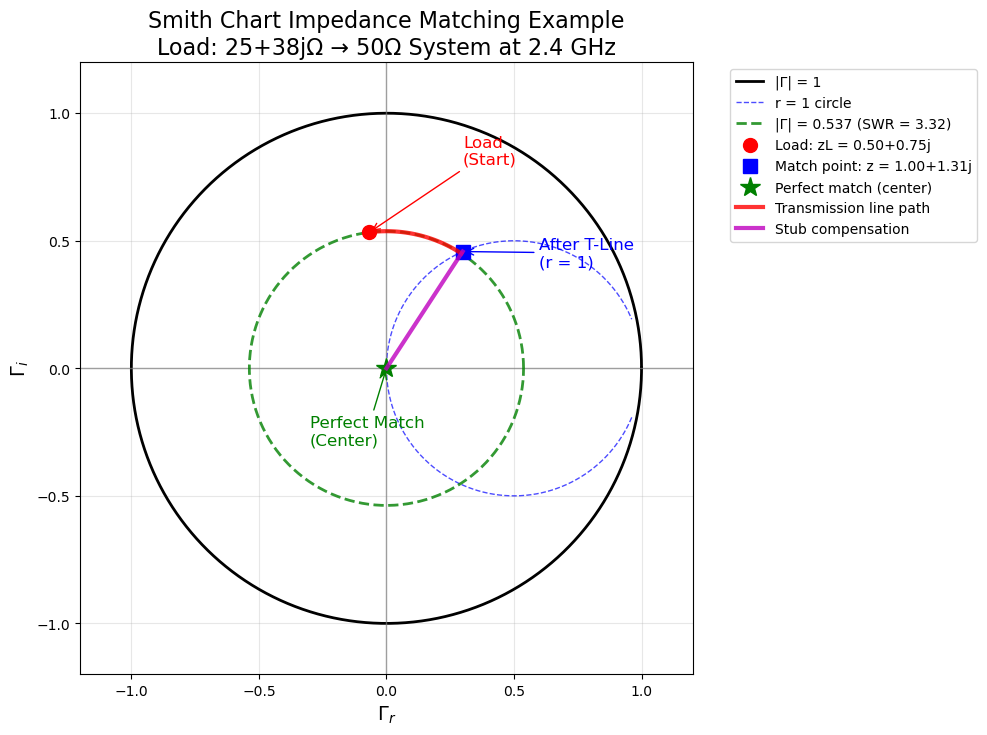


IMPEDANCE MATCHING SOLUTION SUMMARY
Load impedance:              ZL = 25.0+37.5j Ω
Normalized load:             zL = 0.500+0.750j
Load reflection coeff:       ΓL = -0.067+0.533j
VSWR:                        3.32

Required T-line length:      0.888λ = 73.3 mm
Match point impedance:       z = 1.000+1.306j
Required stub susceptance:   b = -1.306
Short-circuit stub length:   0.104λ = 8.6 mm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Stubs and Quarter-Wave Transformer Analysis
# -----------------------------

# System parameters
Z0 = 50.0                    # Characteristic impedance (Ω)
f = 2.4e9                   # Frequency (Hz) 
c = 3e8                     # Speed of light (m/s)
vp = 0.66 * c              # Phase velocity in transmission line
wavelength = vp / f         # Wavelength in the line
beta = 2*np.pi / wavelength # Phase constant (rad/m)

# Create 4-subplot figure for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Helper function to draw basic Smith Chart
def draw_smith_chart_base(ax, title):
    """Draw basic Smith Chart structure"""
    # Unit circle boundary
    theta = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, alpha=0.8)
    
    # Reference lines
    ax.axhline(0, color='gray', linewidth=1, alpha=0.5)
    ax.axvline(0, color='gray', linewidth=1, alpha=0.5)
    
    # r = 1 circle for reference
    g_r1 = circle_constant_r(1)
    ax.plot(np.real(g_r1), np.imag(g_r1), 'b--', linewidth=1, alpha=0.6)
    
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(r'$\Gamma_r$', fontsize=12)
    ax.set_ylabel(r'$\Gamma_i$', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)

# -----------------------------
# Plot 1: Stub Behavior on Smith Chart
# -----------------------------
ax1 = axes[0, 0]
draw_smith_chart_base(ax1, "Stub Behavior on Smith Chart")

# Stub lengths to analyze (in wavelengths)
stub_lengths = np.linspace(0, 0.5, 100)  # 0 to λ/2

# Short-circuit stub analysis
# Z_stub = j*Z0*tan(β*l) → Y_stub = -j/(Z0*tan(β*l)) → b = -cot(β*l)
gamma_short_start = -1 + 0j  # Start at short circuit (Γ = -1)
Z_short = 1j * Z0 * np.tan(2*np.pi * stub_lengths)  # Stub impedance
z_short = Z_short / Z0  # Normalized impedance
gamma_short = gamma_from_z(z_short)

# Open-circuit stub analysis  
# Z_stub = -j*Z0*cot(β*l) → Y_stub = j/(Z0*cot(β*l)) → b = cot(β*l)
gamma_open_start = 1 + 0j   # Start at open circuit (Γ = +1)
Z_open = -1j * Z0 / np.tan(2*np.pi * stub_lengths)  # Stub impedance
z_open = Z_open / Z0  # Normalized impedance  
gamma_open = gamma_from_z(z_open)

# Plot stub paths
ax1.plot(np.real(gamma_short), np.imag(gamma_short), 'r-', linewidth=3, 
         label='Short-circuit stub', alpha=0.8)
ax1.plot(np.real(gamma_open), np.imag(gamma_open), 'b-', linewidth=3,
         label='Open-circuit stub', alpha=0.8)

# Mark starting points
ax1.plot(-1, 0, 'ro', markersize=10, label='Short start (Γ = -1)')
ax1.plot(1, 0, 'bo', markersize=10, label='Open start (Γ = +1)')

# Mark quarter-wave points
gamma_short_qw = gamma_short[25]  # At λ/4
gamma_open_qw = gamma_open[25]    # At λ/4
ax1.plot(np.real(gamma_short_qw), np.imag(gamma_short_qw), 'r*', markersize=15)
ax1.plot(np.real(gamma_open_qw), np.imag(gamma_open_qw), 'b*', markersize=15)

ax1.legend(loc='upper right')

# -----------------------------
# Plot 2: Quarter-Wave Transformer Effects
# -----------------------------
ax2 = axes[0, 1]
draw_smith_chart_base(ax2, "Quarter-Wave Transformer Effects")

# Test different loads through λ/4 transformer
test_loads = [
    0.5 + 0j,      # Low resistance
    2.0 + 0j,      # High resistance  
    1.0 + 1.0j,    # Matched + reactive
    0.25 + 0.5j,   # Complex load 1
    4.0 - 2.0j     # Complex load 2
]

colors_qw = ['red', 'blue', 'green', 'orange', 'purple']
load_labels = ['Low R', 'High R', 'Reactive', 'Complex 1', 'Complex 2']

for i, (zL_norm, color, label) in enumerate(zip(test_loads, colors_qw, load_labels)):
    # Original load
    gamma_L = gamma_from_z(zL_norm)
    
    # After λ/4 transformer: z_in = 1/z_L (impedance inversion)
    z_transformed = 1 / zL_norm
    gamma_transformed = gamma_from_z(z_transformed)
    
    # Plot original and transformed points
    ax2.plot(np.real(gamma_L), np.imag(gamma_L), 'o', color=color, 
             markersize=8, label=f'{label} (orig)')
    ax2.plot(np.real(gamma_transformed), np.imag(gamma_transformed), 's', 
             color=color, markersize=8, label=f'{label} (λ/4)')
    
    # Draw line connecting them (through origin - 180° rotation)
    ax2.plot([np.real(gamma_L), np.real(gamma_transformed)], 
             [np.imag(gamma_L), np.imag(gamma_transformed)], 
             '--', color=color, alpha=0.6)

ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# -----------------------------
# Plot 3: Reactance vs Length for Stubs
# -----------------------------
ax3 = axes[1, 0]

lengths_plot = np.linspace(0, 0.5, 200)  # 0 to λ/2

# Short-circuit stub reactance: X = Z0*tan(βl)
X_short = Z0 * np.tan(2*np.pi * lengths_plot)
# Clip extreme values for plotting
X_short = np.clip(X_short, -500, 500)

# Open-circuit stub reactance: X = -Z0*cot(βl)  
X_open = -Z0 / np.tan(2*np.pi * lengths_plot)
# Clip extreme values for plotting
X_open = np.clip(X_open, -500, 500)

ax3.plot(lengths_plot, X_short, 'r-', linewidth=2, label='Short-circuit stub')
ax3.plot(lengths_plot, X_open, 'b-', linewidth=2, label='Open-circuit stub')

# Mark important points
ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
ax3.axvline(0.25, color='gray', linestyle='--', alpha=0.5, label='λ/4')

ax3.set_xlabel('Stub Length (wavelengths)', fontsize=12)
ax3.set_ylabel('Reactance (Ω)', fontsize=12)
ax3.set_title('Stub Reactance vs Length', fontsize=14)
ax3.set_xlim(0, 0.5)
ax3.set_ylim(-200, 200)
ax3.legend()
ax3.grid(True, alpha=0.3)

# -----------------------------
# Plot 4: Practical Matching Example
# -----------------------------
ax4 = axes[1, 1]
draw_smith_chart_base(ax4, "Practical Matching: 25Ω to 50Ω")

# Example: Match 25Ω load to 50Ω system using quarter-wave transformer
Z_source = 25.0 + 0j        # Load to be matched
Z_target = 50.0 + 0j        # Target impedance

# Calculate required transformer impedance
# For λ/4 transformer: Z_transformer = sqrt(Z_source * Z_target)
Z_transformer = np.sqrt(Z_source * Z_target)
print(f"Required transformer impedance: {Z_transformer:.1f} Ω")

# Normalize impedances
z_source = Z_source / Z0
z_target = Z_target / Z0
z_qw = Z_transformer / Z0

# Calculate reflection coefficients
gamma_source = gamma_from_z(z_source)
gamma_qw = gamma_from_z(z_qw)
gamma_target = gamma_from_z(z_target)

# After λ/4 section with Z_transformer, the input impedance is:
# Z_in = Z_transformer^2 / Z_source
Z_transformed = Z_transformer**2 / Z_source
z_transformed = Z_transformed / Z0
gamma_transformed = gamma_from_z(z_transformed)

# Plot the matching process
ax4.plot(np.real(gamma_source), np.imag(gamma_source), 'ro', markersize=12, 
         label=f'Source: {Z_source:.0f}Ω')
ax4.plot(np.real(gamma_qw), np.imag(gamma_qw), 'bs', markersize=10,
         label=f'Transformer: {Z_transformer:.1f}Ω')  
ax4.plot(np.real(gamma_transformed), np.imag(gamma_transformed), 'g^', markersize=12,
         label=f'Transformed: {Z_transformed:.1f}Ω')
ax4.plot(0, 0, 'k*', markersize=15, label='Perfect match (50Ω)')

# Draw connection lines
ax4.plot([np.real(gamma_source), np.real(gamma_transformed)], 
         [np.imag(gamma_source), np.imag(gamma_transformed)], 
         'r--', linewidth=2, alpha=0.8, label='λ/4 transformation')

ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

# -----------------------------
# Numerical Analysis Table
# -----------------------------
print("\n" + "="*80)
print("STUBS AND QUARTER-WAVE TRANSFORMER ANALYSIS")
print("="*80)

print("\n1. STUB ANALYSIS at λ/8 length:")
print("-" * 40)
stub_length_eighth = 0.125  # λ/8
beta_l = 2 * np.pi * stub_length_eighth

# Short-circuit stub
X_short_eighth = Z0 * np.tan(beta_l)
b_short_eighth = -1/np.tan(beta_l)  # Normalized susceptance

# Open-circuit stub  
X_open_eighth = -Z0 / np.tan(beta_l)
b_open_eighth = np.tan(beta_l)   # Normalized susceptance

print(f"Short-circuit stub (λ/8):")
print(f"  Reactance: {X_short_eighth:.1f} Ω")
print(f"  Normalized susceptance: {b_short_eighth:.3f}")

print(f"Open-circuit stub (λ/8):")
print(f"  Reactance: {X_open_eighth:.1f} Ω") 
print(f"  Normalized susceptance: {b_open_eighth:.3f}")

print("\n2. QUARTER-WAVE TRANSFORMER DESIGN:")
print("-" * 40)
# Design example: Match 25Ω to 50Ω
Z_L_example = 25.0
Z_0_target = 50.0
Z_qw = np.sqrt(Z_L_example * Z_0_target)
reflection_coeff_before = (Z_L_example - Z_0_target) / (Z_L_example + Z_0_target)
reflection_coeff_after = 0  # Perfect match achieved

print(f"Load impedance: {Z_L_example:.0f} Ω")
print(f"Target impedance: {Z_0_target:.0f} Ω")
print(f"Required transformer impedance: {Z_qw:.1f} Ω")
print(f"Reflection coefficient before: {reflection_coeff_before:.3f}")
print(f"Reflection coefficient after: {reflection_coeff_after:.3f}")
print(f"VSWR before: {(1 + abs(reflection_coeff_before))/(1 - abs(reflection_coeff_before)):.2f}")
print(f"VSWR after: 1.00 (perfect match)")

print("\n3. PRACTICAL IMPLEMENTATION:")
print("-" * 40)
physical_length_qw = wavelength / 4 * 1000  # in mm
print(f"λ/4 physical length at {f/1e9:.1f} GHz: {physical_length_qw:.1f} mm")
print(f"λ/8 stub length: {physical_length_qw/2:.1f} mm")

print("\n4. DESIGN GUIDELINES:")
print("-" * 40)
print("• Short-circuit stubs: More practical at high frequencies")
print("• Open-circuit stubs: Sensitive to fringing fields")
print("• Quarter-wave transformers: Very narrowband (~1-2%)")
print("• Use quarter-wave sections for discrete impedance steps")
print("• Use stubs for reactive compensation in matching networks")
print("="*80)import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Stubs and Quarter-Wave Transformer Analysis
# -----------------------------

# System parameters
Z0 = 50.0                    # Characteristic impedance (Ω)
f = 2.4e9                   # Frequency (Hz) 
c = 3e8                     # Speed of light (m/s)
vp = 0.66 * c              # Phase velocity in transmission line
wavelength = vp / f         # Wavelength in the line
beta = 2*np.pi / wavelength # Phase constant (rad/m)

# Create 4-subplot figure for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Helper function to draw basic Smith Chart
def draw_smith_chart_base(ax, title):
    """Draw basic Smith Chart structure"""
    # Unit circle boundary
    theta = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, alpha=0.8)
    
    # Reference lines
    ax.axhline(0, color='gray', linewidth=1, alpha=0.5)
    ax.axvline(0, color='gray', linewidth=1, alpha=0.5)
    
    # r = 1 circle for reference
    g_r1 = circle_constant_r(1)
    ax.plot(np.real(g_r1), np.imag(g_r1), 'b--', linewidth=1, alpha=0.6)
    
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(r'$\Gamma_r$', fontsize=12)
    ax.set_ylabel(r'$\Gamma_i$', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)

# -----------------------------
# Plot 1: Stub Behavior on Smith Chart
# -----------------------------
ax1 = axes[0, 0]
draw_smith_chart_base(ax1, "Stub Behavior on Smith Chart")

# Stub lengths to analyze (in wavelengths)
stub_lengths = np.linspace(0, 0.5, 100)  # 0 to λ/2

# Short-circuit stub analysis
# Z_stub = j*Z0*tan(β*l) → Y_stub = -j/(Z0*tan(β*l)) → b = -cot(β*l)
gamma_short_start = -1 + 0j  # Start at short circuit (Γ = -1)
Z_short = 1j * Z0 * np.tan(2*np.pi * stub_lengths)  # Stub impedance
z_short = Z_short / Z0  # Normalized impedance
gamma_short = gamma_from_z(z_short)

# Open-circuit stub analysis  
# Z_stub = -j*Z0*cot(β*l) → Y_stub = j/(Z0*cot(β*l)) → b = cot(β*l)
gamma_open_start = 1 + 0j   # Start at open circuit (Γ = +1)
Z_open = -1j * Z0 / np.tan(2*np.pi * stub_lengths)  # Stub impedance
z_open = Z_open / Z0  # Normalized impedance  
gamma_open = gamma_from_z(z_open)

# Plot stub paths
ax1.plot(np.real(gamma_short), np.imag(gamma_short), 'r-', linewidth=3, 
         label='Short-circuit stub', alpha=0.8)
ax1.plot(np.real(gamma_open), np.imag(gamma_open), 'b-', linewidth=3,
         label='Open-circuit stub', alpha=0.8)

# Mark starting points
ax1.plot(-1, 0, 'ro', markersize=10, label='Short start (Γ = -1)')
ax1.plot(1, 0, 'bo', markersize=10, label='Open start (Γ = +1)')

# Mark quarter-wave points
gamma_short_qw = gamma_short[25]  # At λ/4
gamma_open_qw = gamma_open[25]    # At λ/4
ax1.plot(np.real(gamma_short_qw), np.imag(gamma_short_qw), 'r*', markersize=15)
ax1.plot(np.real(gamma_open_qw), np.imag(gamma_open_qw), 'b*', markersize=15)

ax1.legend(loc='upper right')

# -----------------------------
# Plot 2: Quarter-Wave Transformer Effects
# -----------------------------
ax2 = axes[0, 1]
draw_smith_chart_base(ax2, "Quarter-Wave Transformer Effects")

# Test different loads through λ/4 transformer
test_loads = [
    0.5 + 0j,      # Low resistance
    2.0 + 0j,      # High resistance  
    1.0 + 1.0j,    # Matched + reactive
    0.25 + 0.5j,   # Complex load 1
    4.0 - 2.0j     # Complex load 2
]

colors_qw = ['red', 'blue', 'green', 'orange', 'purple']
load_labels = ['Low R', 'High R', 'Reactive', 'Complex 1', 'Complex 2']

for i, (zL_norm, color, label) in enumerate(zip(test_loads, colors_qw, load_labels)):
    # Original load
    gamma_L = gamma_from_z(zL_norm)
    
    # After λ/4 transformer: z_in = 1/z_L (impedance inversion)
    z_transformed = 1 / zL_norm
    gamma_transformed = gamma_from_z(z_transformed)
    
    # Plot original and transformed points
    ax2.plot(np.real(gamma_L), np.imag(gamma_L), 'o', color=color, 
             markersize=8, label=f'{label} (orig)')
    ax2.plot(np.real(gamma_transformed), np.imag(gamma_transformed), 's', 
             color=color, markersize=8, label=f'{label} (λ/4)')
    
    # Draw line connecting them (through origin - 180° rotation)
    ax2.plot([np.real(gamma_L), np.real(gamma_transformed)], 
             [np.imag(gamma_L), np.imag(gamma_transformed)], 
             '--', color=color, alpha=0.6)

ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# -----------------------------
# Plot 3: Reactance vs Length for Stubs
# -----------------------------
ax3 = axes[1, 0]

lengths_plot = np.linspace(0, 0.5, 200)  # 0 to λ/2

# Short-circuit stub reactance: X = Z0*tan(βl)
X_short = Z0 * np.tan(2*np.pi * lengths_plot)
# Clip extreme values for plotting
X_short = np.clip(X_short, -500, 500)

# Open-circuit stub reactance: X = -Z0*cot(βl)  
X_open = -Z0 / np.tan(2*np.pi * lengths_plot)
# Clip extreme values for plotting
X_open = np.clip(X_open, -500, 500)

ax3.plot(lengths_plot, X_short, 'r-', linewidth=2, label='Short-circuit stub')
ax3.plot(lengths_plot, X_open, 'b-', linewidth=2, label='Open-circuit stub')

# Mark important points
ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
ax3.axvline(0.25, color='gray', linestyle='--', alpha=0.5, label='λ/4')

ax3.set_xlabel('Stub Length (wavelengths)', fontsize=12)
ax3.set_ylabel('Reactance (Ω)', fontsize=12)
ax3.set_title('Stub Reactance vs Length', fontsize=14)
ax3.set_xlim(0, 0.5)
ax3.set_ylim(-200, 200)
ax3.legend()
ax3.grid(True, alpha=0.3)

# -----------------------------
# Plot 4: Practical Matching Example
# -----------------------------
ax4 = axes[1, 1]
draw_smith_chart_base(ax4, "Practical Matching: 25Ω to 50Ω")

# Example: Match 25Ω load to 50Ω system using quarter-wave transformer
Z_source = 25.0 + 0j        # Load to be matched
Z_target = 50.0 + 0j        # Target impedance

# Calculate required transformer impedance
# For λ/4 transformer: Z_transformer = sqrt(Z_source * Z_target)
Z_transformer = np.sqrt(Z_source * Z_target)
print(f"Required transformer impedance: {Z_transformer:.1f} Ω")

# Normalize impedances
z_source = Z_source / Z0
z_target = Z_target / Z0
z_qw = Z_transformer / Z0

# Calculate reflection coefficients
gamma_source = gamma_from_z(z_source)
gamma_qw = gamma_from_z(z_qw)
gamma_target = gamma_from_z(z_target)

# After λ/4 section with Z_transformer, the input impedance is:
# Z_in = Z_transformer^2 / Z_source
Z_transformed = Z_transformer**2 / Z_source
z_transformed = Z_transformed / Z0
gamma_transformed = gamma_from_z(z_transformed)

# Plot the matching process
ax4.plot(np.real(gamma_source), np.imag(gamma_source), 'ro', markersize=12, 
         label=f'Source: {Z_source:.0f}Ω')
ax4.plot(np.real(gamma_qw), np.imag(gamma_qw), 'bs', markersize=10,
         label=f'Transformer: {Z_transformer:.1f}Ω')  
ax4.plot(np.real(gamma_transformed), np.imag(gamma_transformed), 'g^', markersize=12,
         label=f'Transformed: {Z_transformed:.1f}Ω')
ax4.plot(0, 0, 'k*', markersize=15, label='Perfect match (50Ω)')

# Draw connection lines
ax4.plot([np.real(gamma_source), np.real(gamma_transformed)], 
         [np.imag(gamma_source), np.imag(gamma_transformed)], 
         'r--', linewidth=2, alpha=0.8, label='λ/4 transformation')

ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

# -----------------------------
# Numerical Analysis Table
# -----------------------------
print("\n" + "="*80)
print("STUBS AND QUARTER-WAVE TRANSFORMER ANALYSIS")
print("="*80)

print("\n1. STUB ANALYSIS at λ/8 length:")
print("-" * 40)
stub_length_eighth = 0.125  # λ/8
beta_l = 2 * np.pi * stub_length_eighth

# Short-circuit stub
X_short_eighth = Z0 * np.tan(beta_l)
b_short_eighth = -1/np.tan(beta_l)  # Normalized susceptance

# Open-circuit stub  
X_open_eighth = -Z0 / np.tan(beta_l)
b_open_eighth = np.tan(beta_l)   # Normalized susceptance

print(f"Short-circuit stub (λ/8):")
print(f"  Reactance: {X_short_eighth:.1f} Ω")
print(f"  Normalized susceptance: {b_short_eighth:.3f}")

print(f"Open-circuit stub (λ/8):")
print(f"  Reactance: {X_open_eighth:.1f} Ω") 
print(f"  Normalized susceptance: {b_open_eighth:.3f}")

print("\n2. QUARTER-WAVE TRANSFORMER DESIGN:")
print("-" * 40)
# Design example: Match 25Ω to 50Ω
Z_L_example = 25.0
Z_0_target = 50.0
Z_qw = np.sqrt(Z_L_example * Z_0_target)
reflection_coeff_before = (Z_L_example - Z_0_target) / (Z_L_example + Z_0_target)
reflection_coeff_after = 0  # Perfect match achieved

print(f"Load impedance: {Z_L_example:.0f} Ω")
print(f"Target impedance: {Z_0_target:.0f} Ω")
print(f"Required transformer impedance: {Z_qw:.1f} Ω")
print(f"Reflection coefficient before: {reflection_coeff_before:.3f}")
print(f"Reflection coefficient after: {reflection_coeff_after:.3f}")
print(f"VSWR before: {(1 + abs(reflection_coeff_before))/(1 - abs(reflection_coeff_before)):.2f}")
print(f"VSWR after: 1.00 (perfect match)")

print("\n3. PRACTICAL IMPLEMENTATION:")
print("-" * 40)
physical_length_qw = wavelength / 4 * 1000  # in mm
print(f"λ/4 physical length at {f/1e9:.1f} GHz: {physical_length_qw:.1f} mm")
print(f"λ/8 stub length: {physical_length_qw/2:.1f} mm")

print("\n4. DESIGN GUIDELINES:")
print("-" * 40)
print("• Short-circuit stubs: More practical at high frequencies")
print("• Open-circuit stubs: Sensitive to fringing fields")
print("• Quarter-wave transformers: Very narrowband (~1-2%)")
print("• Use quarter-wave sections for discrete impedance steps")
print("• Use stubs for reactive compensation in matching networks")
print("="*80)import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Impedance Matching Example
# -----------------------------

# System parameters
Z0 = 50.0                    # System impedance (Ω)
ZL = 25 + 37.5j             # Load impedance (Ω)
f = 2.4e9                   # Frequency (Hz)
c = 3e8                     # Speed of light (m/s)
vp = 0.66 * c              # Phase velocity (typical coax)
wavelength = vp / f         # Wavelength in the transmission line

# Normalize the load impedance
zL = ZL / Z0               # Normalized load impedance
print(f"Load impedance ZL = {ZL:.1f} Ω")
print(f"Normalized load impedance zL = {zL:.3f}")

# Calculate reflection coefficient of the load
gamma_load = gamma_from_z(zL)
print(f"Load reflection coefficient ΓL = {gamma_load:.3f}")
print(f"Load |ΓL| = {abs(gamma_load):.3f}")

# -----------------------------
# Step 1: Plot the Smith Chart with matching solution
# -----------------------------

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Draw Smith Chart boundary
theta = np.linspace(0, 2*np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, label='|Γ| = 1')

# Draw some key circles for reference
# Unity resistance circle (r = 1)
g_r1 = circle_constant_r(1)
ax.plot(np.real(g_r1), np.imag(g_r1), 'b--', linewidth=1, alpha=0.7, label='r = 1 circle')

# Real axis (x = 0)
ax.axhline(0, color='gray', linewidth=1, alpha=0.7)
ax.axvline(0, color='gray', linewidth=1, alpha=0.7)

# -----------------------------
# Step 2: Find matching solution
# -----------------------------

# The |Γ| circle for our load (constant SWR circle)
gamma_mag = abs(gamma_load)
swr = (1 + gamma_mag) / (1 - gamma_mag)
circle_angles = np.linspace(0, 2*np.pi, 400)
gamma_circle_r = gamma_mag * np.cos(circle_angles)
gamma_circle_i = gamma_mag * np.sin(circle_angles)
ax.plot(gamma_circle_r, gamma_circle_i, 'g--', linewidth=2, alpha=0.8, 
        label=f'|Γ| = {gamma_mag:.3f} (SWR = {swr:.2f})')

# Find intersections of |Γ| circle with r = 1 circle
# We need to solve this numerically by finding where the circles intersect

# Generate points on the r = 1 circle and find closest to our |Γ| value
r1_points = circle_constant_r(1)
distances = np.abs(np.abs(r1_points) - gamma_mag)
match_indices = np.where(distances < 0.01)[0]  # Find close points

if len(match_indices) > 0:
    # Take the two intersection points
    idx1, idx2 = match_indices[0], match_indices[-1]
    match_point1 = r1_points[idx1]
    match_point2 = r1_points[idx2]
    
    # Choose the one in upper half-plane (positive reactance)
    if np.imag(match_point1) > np.imag(match_point2):
        match_point = match_point1
    else:
        match_point = match_point2
else:
    # Analytical solution for intersection
    # For r = 1 circle and |Γ| = gamma_mag
    gamma_r_match = (gamma_mag**2) / 2
    gamma_i_match = np.sqrt(gamma_mag**2 - gamma_r_match**2)
    match_point = gamma_r_match + 1j * gamma_i_match

print(f"Match point on r=1 circle: Γ = {match_point:.3f}")

# Convert back to impedance
z_match = (1 + match_point) / (1 - match_point)
print(f"Impedance at match point: z = {z_match:.3f}")

# -----------------------------
# Step 3: Calculate transmission line length
# -----------------------------

# Angle from load to match point (clockwise rotation)
angle_load = np.angle(gamma_load)
angle_match = np.angle(match_point)
rotation_angle = angle_match - angle_load

# Normalize angle to [0, 2π]
if rotation_angle < 0:
    rotation_angle += 2*np.pi

# Convert to electrical length and physical length
electrical_length = rotation_angle / (2 * np.pi)  # In wavelengths
physical_length = electrical_length * wavelength * 1000  # In mm

print(f"Required transmission line length: {electrical_length:.3f}λ = {physical_length:.1f} mm")

# -----------------------------
# Step 4: Calculate stub length
# -----------------------------

# At the match point, we have z = 1 + jx
# We need a shunt susceptance b = -x to cancel the reactance
x_match = np.imag(z_match)
b_required = -x_match  # Required normalized susceptance

print(f"Required shunt susceptance: b = {b_required:.3f}")

# For a short-circuited stub, b = -cot(βl)
# So βl = arccot(-b) = π/2 + arctan(b)
if b_required != 0:
    beta_l_stub = np.pi/2 + np.arctan(b_required)
    if beta_l_stub < 0:
        beta_l_stub += np.pi
    
    stub_electrical_length = beta_l_stub / (2 * np.pi)
    stub_physical_length = stub_electrical_length * wavelength * 1000
    
    print(f"Short-circuit stub length: {stub_electrical_length:.3f}λ = {stub_physical_length:.1f} mm")
else:
    print("No stub needed (already matched)")

# -----------------------------
# Plot the solution on Smith Chart
# -----------------------------

# Plot key points
ax.plot(np.real(gamma_load), np.imag(gamma_load), 'ro', markersize=10, 
        label=f'Load: zL = {zL:.2f}')
ax.plot(np.real(match_point), np.imag(match_point), 'bs', markersize=10,
        label=f'Match point: z = {z_match:.2f}')
ax.plot(0, 0, 'g*', markersize=15, label='Perfect match (center)')

# Draw path from load to match point (transmission line transformation)
# This is an arc along the constant |Γ| circle
angles_path = np.linspace(angle_load, angle_match, 50)
path_points = gamma_mag * np.exp(1j * angles_path)
ax.plot(np.real(path_points), np.imag(path_points), 'r-', linewidth=3, alpha=0.8,
        label='Transmission line path')

# Draw line from match point to center (stub compensation)
ax.plot([np.real(match_point), 0], [np.imag(match_point), 0], 'm-', 
        linewidth=3, alpha=0.8, label='Stub compensation')

# Add annotations
ax.annotate('Load\n(Start)', xy=(np.real(gamma_load), np.imag(gamma_load)), 
            xytext=(0.3, 0.8), fontsize=12, color='red',
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('After T-Line\n(r = 1)', xy=(np.real(match_point), np.imag(match_point)), 
            xytext=(0.6, 0.4), fontsize=12, color='blue',
            arrowprops=dict(arrowstyle='->', color='blue'))

ax.annotate('Perfect Match\n(Center)', xy=(0, 0), 
            xytext=(-0.3, -0.3), fontsize=12, color='green',
            arrowprops=dict(arrowstyle='->', color='green'))

# Formatting
ax.set_aspect('equal', 'box')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel(r'$\Gamma_r$', fontsize=14)
ax.set_ylabel(r'$\Gamma_i$', fontsize=14)
ax.set_title('Smith Chart Impedance Matching Example\n' + 
             f'Load: {ZL:.0f}Ω → 50Ω System at {f/1e9:.1f} GHz', fontsize=16)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# Summary of results
# -----------------------------
print("\n" + "="*60)
print("IMPEDANCE MATCHING SOLUTION SUMMARY")
print("="*60)
print(f"Load impedance:              ZL = {ZL:.1f} Ω")
print(f"Normalized load:             zL = {zL:.3f}")
print(f"Load reflection coeff:       ΓL = {gamma_load:.3f}")
print(f"VSWR:                        {swr:.2f}")
print(f"")
print(f"Required T-line length:      {electrical_length:.3f}λ = {physical_length:.1f} mm")
print(f"Match point impedance:       z = {z_match:.3f}")
print(f"Required stub susceptance:   b = {b_required:.3f}")
if b_required != 0:
    print(f"Short-circuit stub length:   {stub_electrical_length:.3f}λ = {stub_physical_length:.1f} mm")
print("="*60)

## Practical Applications and Extensions

### Using the Smith Chart:

1. **Impedance Matching**: 
   - Plot the load impedance on the chart
   - Use transmission line lengths to rotate around constant |Γ| circles
   - Add series/parallel elements to move along constant resistance/reactance circles

2. **Transmission Line Analysis**:
   - Moving along a transmission line corresponds to rotation around the chart center
   - Electrical length θ = βl corresponds to rotation angle θ

3. **S-Parameter Visualization**:
   - S₁₁ and S₂₂ can be directly plotted as points on the Smith Chart
   - Useful for amplifier stability analysis

## Appendix

### Detailed Theory: Step 4 - Shunt Stub Design

#### **Stub Matching Principle**

A **shunt stub** is a short section of transmission line connected in parallel to the main line. It provides **pure susceptance** for reactive compensation:

$$Y_{stub} = jB_{stub} = j \cdot b_{stub} \cdot Y_0$$

Where $b_{stub}$ is the **normalized susceptance** and $Y_0 = \frac{1}{Z_0}$ is the characteristic admittance.

#### **Short-Circuit Stub Analysis**

For a **short-circuited stub** of length $l_s$:

$$Z_{stub} = jZ_0 \tan(\beta l_s)$$

The input **admittance** (susceptance) is:

$$Y_{stub} = \frac{1}{Z_{stub}} = \frac{-j}{Z_0 \tan(\beta l_s)} = -j\frac{Y_0}{\tan(\beta l_s)}$$

Therefore: $$b_{stub} = -\cot(\beta l_s)$$

#### **Design Equation**

To cancel the reactance $x$ at the matching point, we need:
$$b_{required} = -x$$

Solving for stub length:
$$\cot(\beta l_s) = b_{required}$$
$$\beta l_s = \text{arccot}(b_{required}) = \frac{\pi}{2} + \arctan(b_{required})$$

#### **Physical Implementation Options**

| Stub Type | Input Impedance | Susceptance Range | Typical Use |
|-----------|----------------|-------------------|-------------|
| **Short-circuit** | $jZ_0 \tan(\beta l)$ | All values | Most common |
| **Open-circuit** | $-jZ_0 \cot(\beta l)$ | All values | High frequency |
| **Radial stub** | Variable geometry | Compact design | Microwave circuits |

#### **Practical Considerations**

- **Bandwidth**: Single-stub matching is **narrowband** (~5-10% fractional bandwidth)
- **Frequency sensitivity**: Stub length changes with frequency
- **Physical constraints**: Minimum practical stub length ~0.01λ
- **Multiple solutions**: Two possible stub lengths per period (choose shorter one)

### Complete Matching Network Analysis

#### **Why the r = 1 Circle is Critical**

The **unity resistance circle** (r = 1) is fundamental to single-stub matching because:

1. **Shunt elements affect admittance**: $Y_{Stubb} = jB_{Stubb}$
2. **At r = 1**: Z=1+jx； Y = 1/Z = 1 - jx
3. **Only susceptance compensation needed**: Add $jB_{stub} = -jx $

#### **Alternative Matching Strategies**

| Method | Advantages | Disadvantages | Applications |
|--------|------------|---------------|--------------|
| **Single-stub** | Simple, adjustable | Narrowband | Fixed frequency |
| **Double-stub** | Broader bandwidth | More complex | Multi-frequency |
| **Quarter-wave transformer** | Simple design | Very narrowband | Single frequency |
| **Lumped L-C matching** | Compact | Component tolerances | Low frequency |

#### **Design Verification**

After implementing the matching network, verify:

1. **Input reflection coefficient**: $|\Gamma_{in}| \approx 0$ at design frequency
2. **VSWR**: Should be close to 1:1 at the input
3. **Bandwidth**: Check performance over required frequency range
4. **Power transfer**: Maximum when perfectly matched

#### **Practical Design Steps Summary**

```
Step 1: Normalize load impedance → zL = ZL/Z0
Step 2: Calculate load reflection coefficient → ΓL
Step 3: Plot ΓL on Smith Chart
Step 4: Rotate along |ΓL| circle to r = 1 intersection
Step 5: Calculate required transmission line length
Step 6: Calculate required stub susceptance
Step 7: Design stub length for required susceptance
Step 8: Verify design performance
```

This systematic approach ensures reliable impedance matching for RF and microwave systems.

### Impedance Matching Solution Explanation

The Smith Chart visualization above demonstrates a complete **single-stub matching** solution:

#### **Step-by-Step Process:**

1. **Load Analysis** (Red circle):
   - Original load: ZL = 25 + j37.5Ω (normalized: zL = 0.5 + j0.75)
   - VSWR = 3.32 (indicating significant mismatch)
   - Load reflection coefficient: ΓL = -0.067 + j0.533

2. **Transmission Line Transformation** (Red path):
   - Move along constant |Γ| circle (green dashed line)
   - Rotate 0.888λ = 73.3 mm to reach r = 1 circle
   - Achieves impedance z = 1 + j1.306 (50Ω + j65.3Ω)

3. **Stub Compensation** (Magenta line):
   - Add shunt stub with susceptance b = -1.306
   - Short-circuit stub length: 0.104λ = 8.6 mm
   - Cancels reactive component, reaching perfect match at center

#### **Physical Implementation:**

```
Source ──[T-line: 73.3mm]──┬──[Load: 25+j37.5Ω]
   50Ω                      │
                            │
                       [Stub: 8.6mm]
                       (short-circuit)
```

#### **Key Insights:**

- **Constant |Γ| Movement**: Transmission lines rotate impedance around constant SWR circles
- **Unity Resistance Circle**: Critical for single-stub matching (r = 1 enables shunt compensation)
- **Stub Length**: Determined by required susceptance to cancel reactance
- **Bandwidth**: Single-stub matches are narrowband (good only near design frequency)

This method is widely used in **antenna matching**, **amplifier design**, and **filter circuits** for achieving optimal power transfer.